!pip install matplotlib 

In [ ]:
words = open("names.txt","r").read().splitlines()


In [ ]:
len(words)

In [ ]:
min(len(w) for w in words)

In [ ]:
max(len(w) for w in words)

In [ ]:
15]

In [ ]:
words[-10:]

In [ ]:
words[len(words) -1]

In [ ]:
# bi-grams, 2 letter words
for w in words[:1]:
    for ch1, ch2 in zip(w,w[1:]):
        print(ch1, ch2)

In [ ]:
w

In [ ]:
w[1:]

In [ ]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

In [ ]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1
        # print(ch1, ch2)

In [ ]:
b.items()

In [ ]:
sorted(b.items(), key = lambda kv: kv[1])

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [ ]:
import torch

In [ ]:
a = torch.zeros((3,5), dtype = torch.int32)
a

In [ ]:
a.dtype

In [ ]:
a[1,3] = 1
a

In [ ]:
a[1,3] += 1
a

In [ ]:
# 26 letters + <S> and <#>
N = torch.zeros((28,28), dtype=torch.int32)

In [ ]:
N

In [ ]:
sorted(list(set(''.join(words))))

In [ ]:
words[:5]

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
chars

In [ ]:
stoi

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ ix1, ix2 ] += 1

In [ ]:
# N['a','r'] is the number of occurence that a,r sequence happened in list of names
N

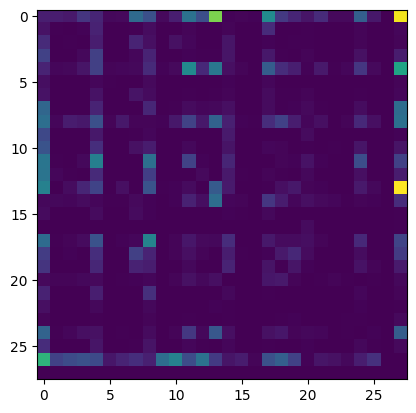

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [58]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

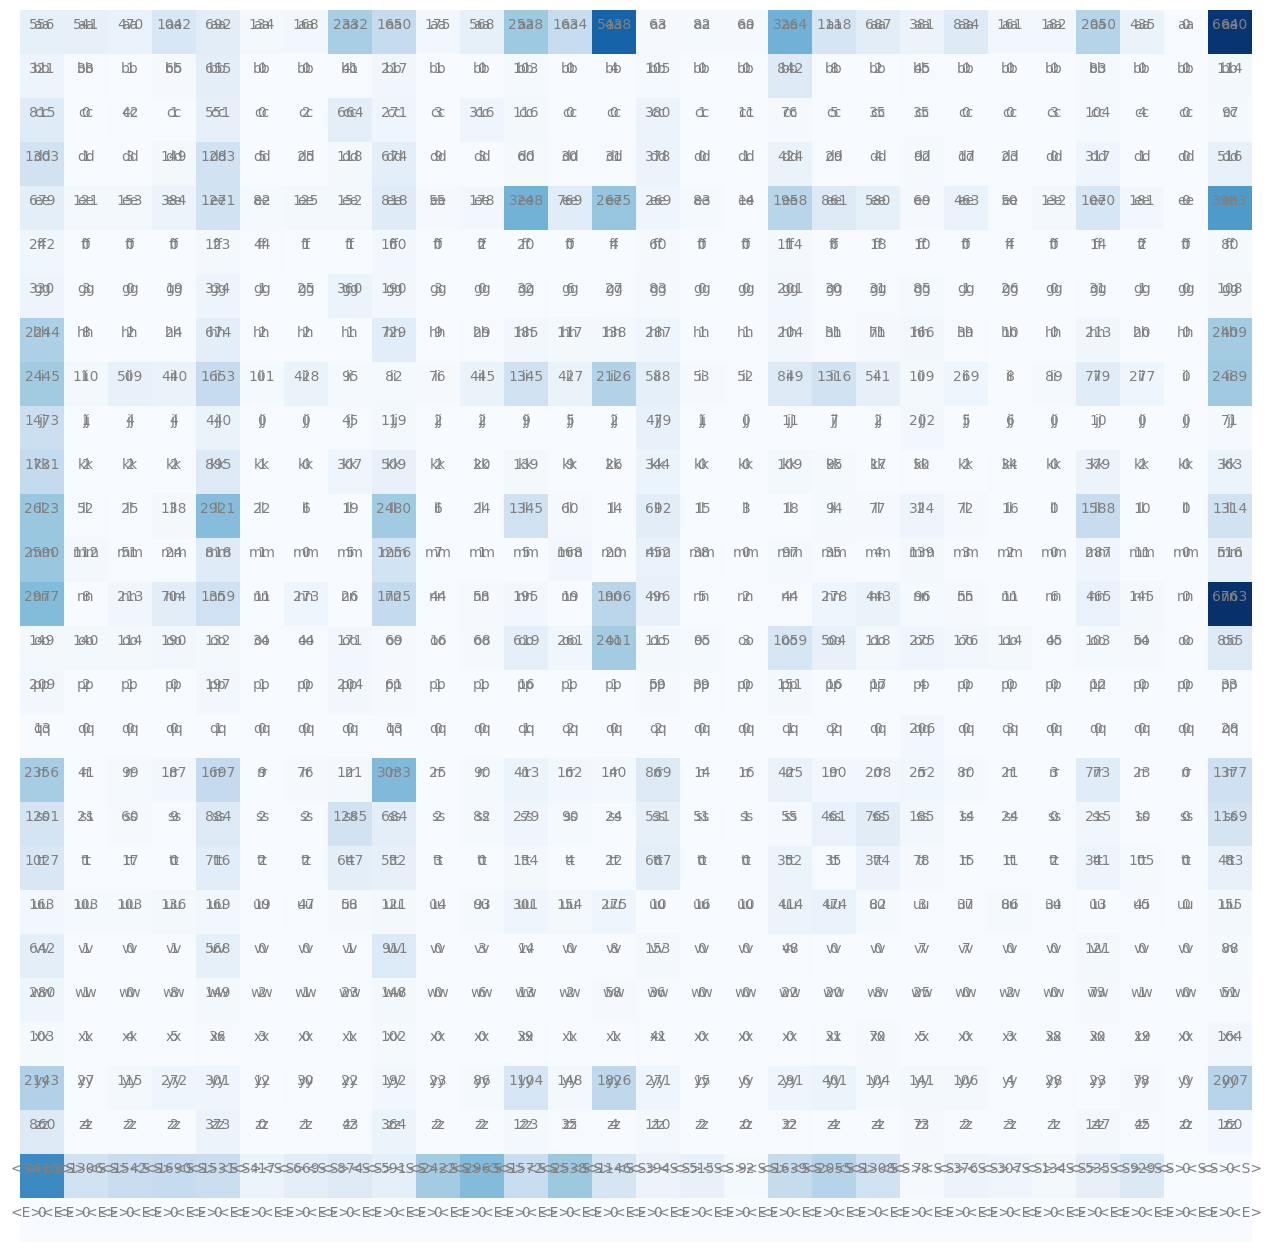

In [60]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[i]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="bottom", color="gray")
plt.axis('off')

In [ ]:
# problem - 
# <E> is never the first character in the bigram <E>A -entire row of 0
# <S> could never be the 2nd chat in the bigram R<S> - entire oolumn of 0
# <S?<E> can never happen or <E><S>
# clean up the data - wasting space

use omly one special token
use omly one spcecial token. use 27x27 array

In [61]:
# 26 letters + <S> and <#>
N = torch.zeros((27,27), dtype=torch.int32)777777

In [62]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}        # first char should start at 1
#stoi['<S>'] = 26
#stoi['<E>'] = 27
stoi['.'] = 0             # only one special character. place in position 0, and 'a' should start on position 1
itos = {i:s for s,i in stoi.items()}


In [64]:
#stoi
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [65]:
for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ ix1, ix2 ] += 1

(-0.5, 26.5, 26.5, -0.5)

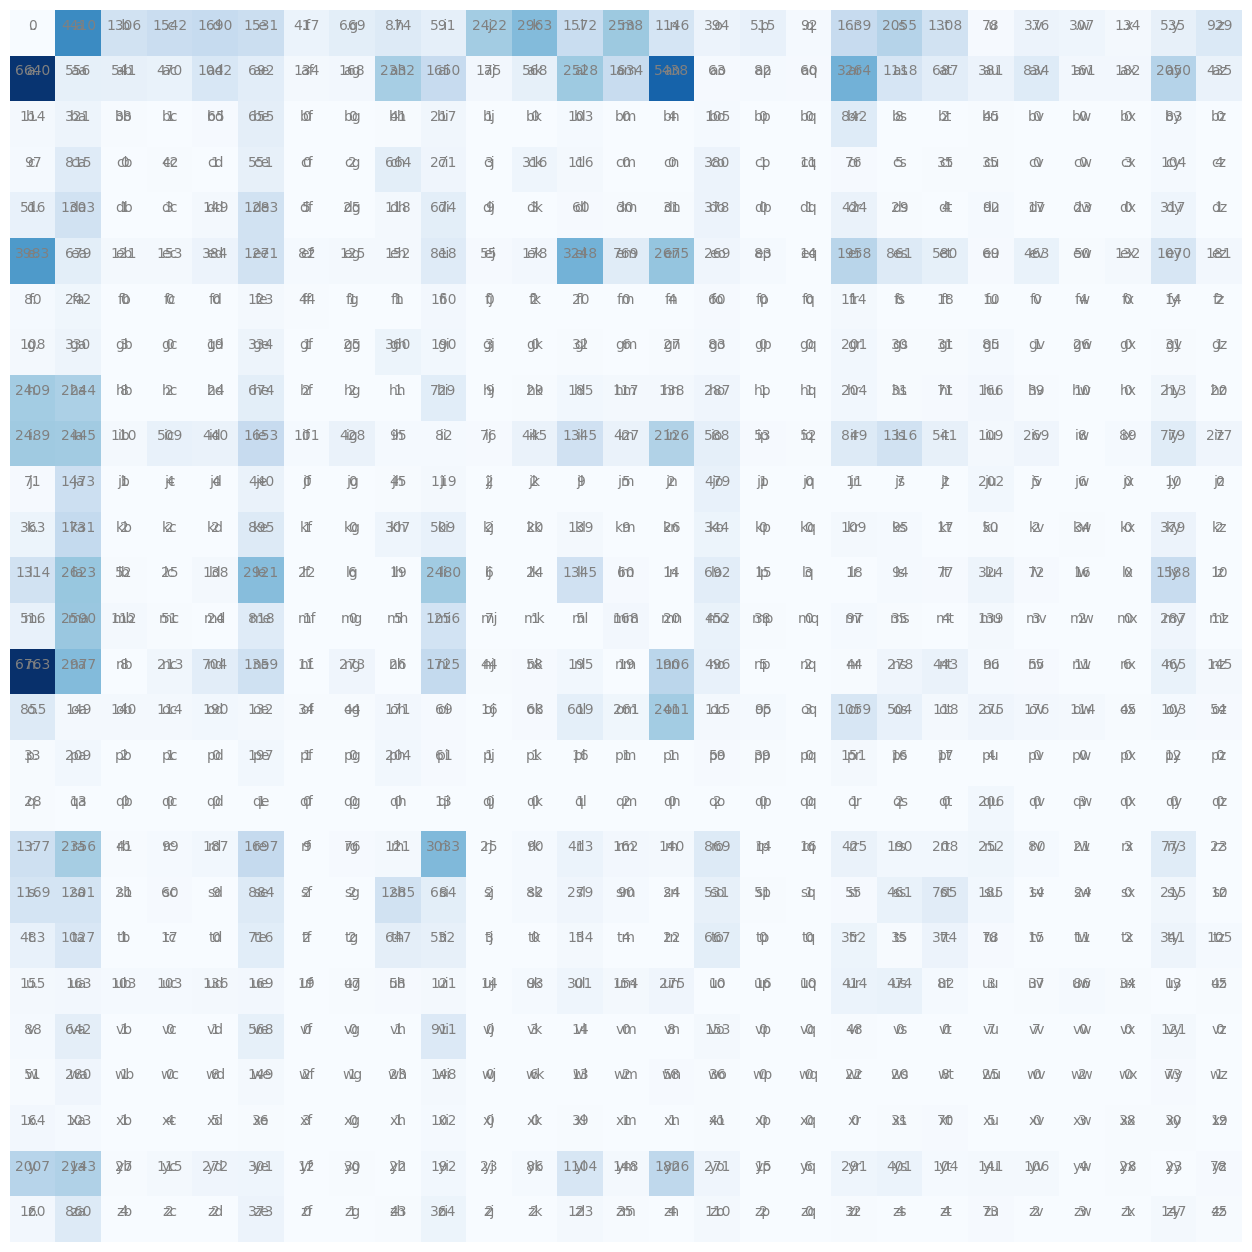

In [67]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="bottom", color="gray")
plt.axis('off')